In [4]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [5]:
# Query to retrieve UCLA offensive stats along with weather, altitude, and distance
query = """
SELECT date, location, opponent, result,
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, opponent_passing_td, 
       opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, opponent_total_first_downs, 
       opponent_total_penalties, opponent_total_penalties_yds, opponent_total_fum, opponent_total_int, opponent_total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Defensive_Stats;
"""

oregon_data = pd.read_sql(query, conn)

oregon_data.head()

,date,location,opponent,result,opponent_passing_cmp,opponent_passing_att,opponent_completion_pct,opponent_passing_yds,opponent_passing_td,opponent_rushing_att,...,opponent_total_penalties,opponent_total_penalties_yds,opponent_total_fum,opponent_total_int,opponent_total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2023-11-18,@,Arizona State,W (49-13),25,47,53.2,205,0,18,...,4,37,0,1,1,68.2,0.141,4.5,360.0,946.82
1,2023-11-24,H,Oregon State,W (31-7),19,35,54.3,220,1,24,...,4,23,0,1,1,37.5,0.000,6.5,131.0,0.00
2,2023-12-01,N,Washington,L (31-34),29,41,70.7,324,2,37,...,7,50,0,1,1,68.0,0.000,0.0,620.0,687.00
3,2024-01-01,N,Liberty*,W (45-6),15,24,62.5,126,1,28,...,6,49,1,1,2,52.2,0.000,3.2,351.1,932.00
4,2022-09-03,N,Georgia,L (3-49),30,37,81.1,439,3,25,...,7,75,0,0,0,68.0,0.000,0.0,320.0,2181.00


In [6]:

# Define distance ranges (you can adjust these as needed)
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# Create a new column for distance categories
oregon_data['Distance_Range'] = pd.cut(oregon_data['distance_from'], bins=bins, labels=labels, right=False)

# Group by distance range and calculate mean values for the metrics
distance_grouped = oregon_data.groupby('Distance_Range').agg({
    'opponent_passing_yds': 'mean',
    'opponent_rushing_yds': 'mean',
    'opponent_total_yards': 'mean',
    'opponent_completion_pct': 'mean',
    'opponent_passing_td': 'mean',
    'opponent_rushing_att': 'mean',
    'opponent_passing_att': 'mean',   # Include passing_att here
    'opponent_rushing_td': 'mean',
    'opponent_total_first_downs': 'mean',
    'opponent_total_to': 'mean'
}).reset_index()

# Display the grouped data
distance_grouped.head()


,Distance_Range,opponent_passing_yds,opponent_rushing_yds,opponent_total_yards,opponent_completion_pct,opponent_passing_td,opponent_rushing_att,opponent_passing_att,opponent_rushing_td,opponent_total_first_downs,opponent_total_to
0,<500,246.212121,141.757576,387.969697,59.647475,1.646465,35.484848,37.141414,1.333333,21.606061,1.666667
1,500-1000,241.678571,157.250000,398.928571,57.935714,1.428571,38.607143,36.071429,1.464286,21.892857,1.857143
2,1000-1500,218.000000,219.400000,437.400000,62.580000,2.400000,44.000000,34.000000,2.000000,26.400000,1.800000
3,1500+,264.111111,195.444444,459.555556,62.811111,1.777778,41.111111,35.777778,2.333333,23.888889,1.666667


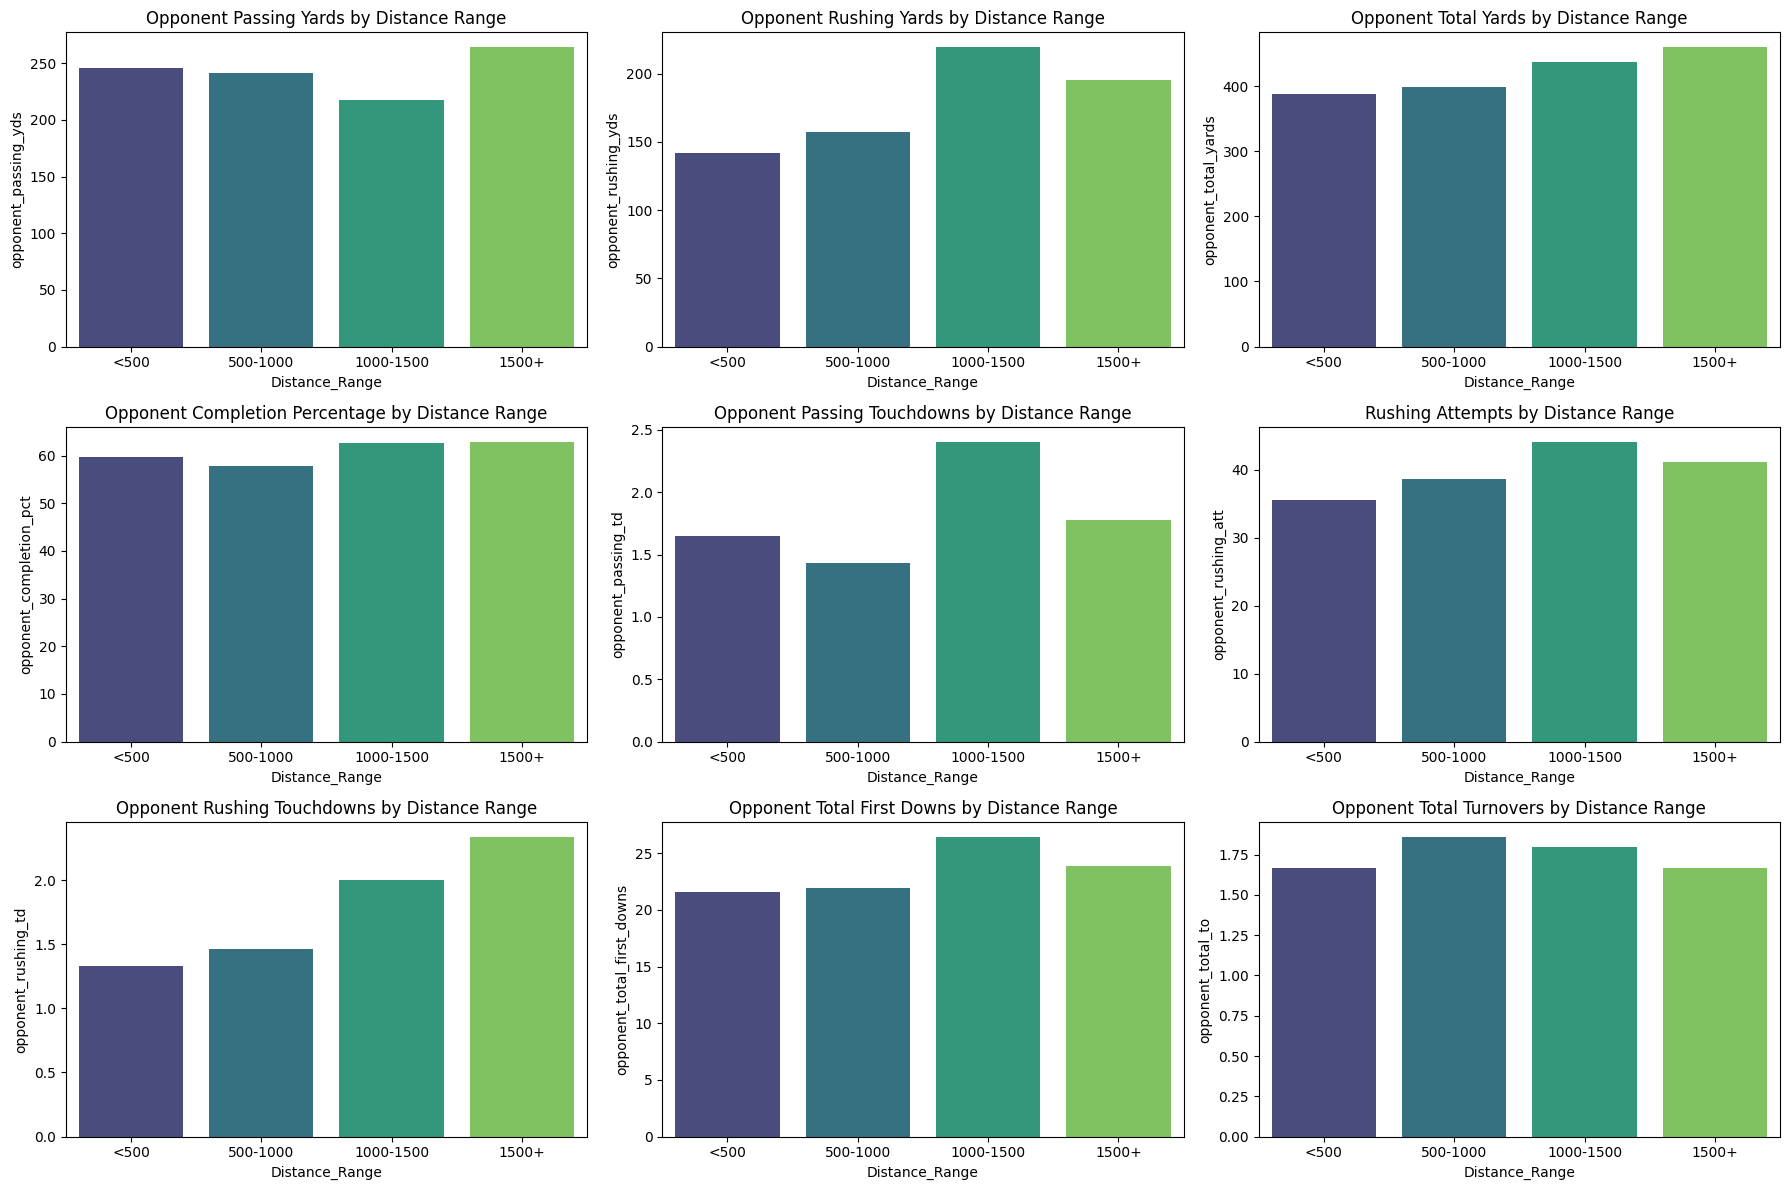

In [7]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Opponent Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Opponent Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Opponent Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Opponent Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Opponent Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Opponent Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Opponent Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Opponent Total Turnovers by Distance Range')

# layout
plt.tight_layout()
plt.show()


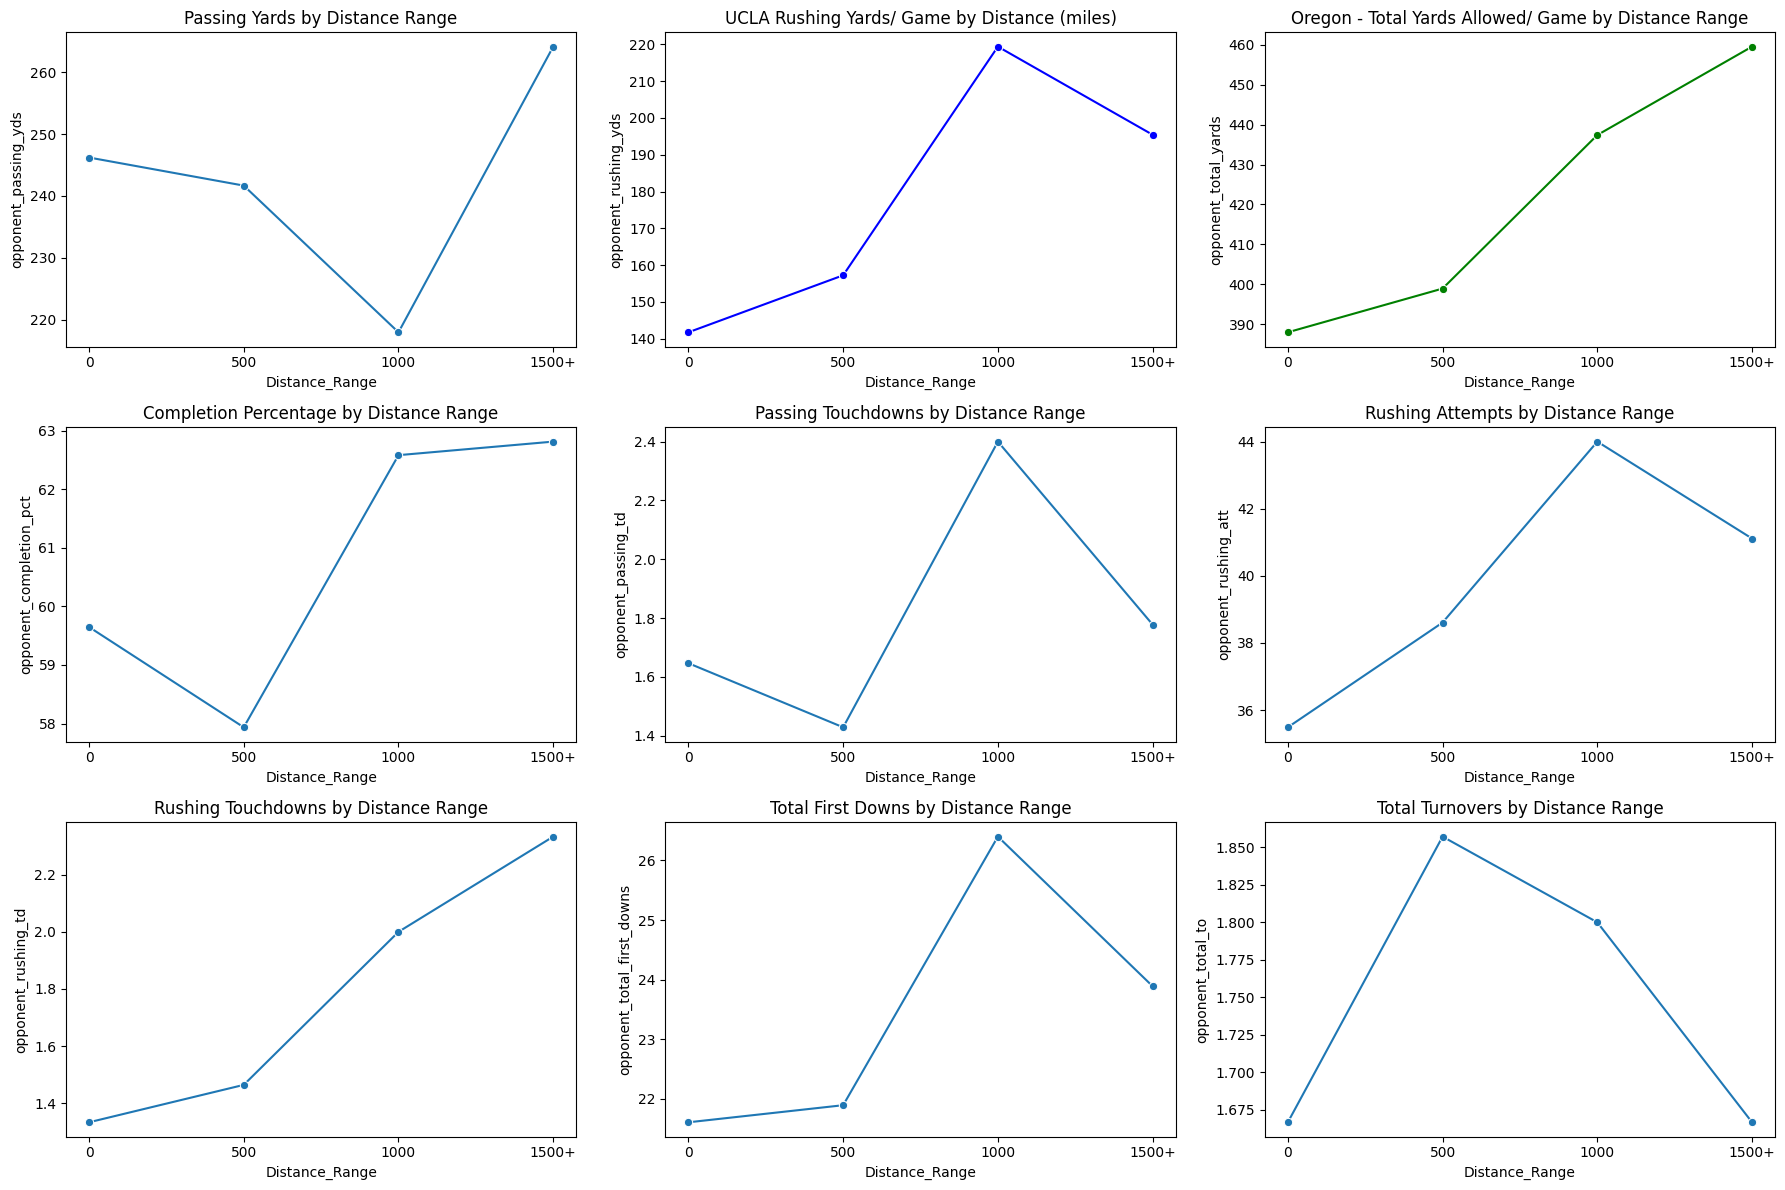

In [9]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'blue')
axs[0, 1].set_title('UCLA Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, marker='o', ax=axs[0, 2], color = 'green')
axs[0, 2].set_title('Oregon - Total Yards Allowed/ Game by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)

# layout
plt.tight_layout()
plt.show()
